In [1]:
#mounting drive for dataset and pretrained weights of inception resnet v2
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#unzipping dataset and inception resnet v2 weights

import zipfile

#zip_ref = zipfile.ZipFile("/content/gdrive/My Drive/painting.zip", 'r')
zip_ref = zipfile.ZipFile("/content/gdrive/My Drive/painting.zip", 'r')
zip_ref1 = zipfile.ZipFile("/content/gdrive/My Drive/inception-resnet-v2-weights.zip", 'r')

zip_ref.extractall()
zip_ref1.extractall()

zip_ref.close()
zip_ref1.close()

In [3]:
#importing necessary frameworks

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model;
from keras.layers import Input, Dense, UpSampling2D, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.models import Model, load_model,Sequential


Using TensorFlow backend.


In [0]:
import matplotlib.image as mpimg
import os 
path = "/content/painting/"
train_ids = next(os.walk(path))[2]                               #generating ids for all images



In [5]:

from skimage.io import imread
from skimage.transform import resize


X_train = np.zeros(( (len(train_ids)-86), 256, 256, 3))


count = 0
for n, id_ in enumerate(train_ids): 
    
    path_new =  path + id_+''
    try:
        
        img = imread(path_new)

        img = resize(img, (256, 256),mode='constant', preserve_range=True)
        #print(img)
        X_train[n-count] = img
        
    except:                                                    #certain images have error and couldn't be assigned an id.
        count = count+1
        print("image not found")


X_train = X_train.astype('float32') / 255.                    # Normalising images
    
print("count",count)

image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image not found
image no

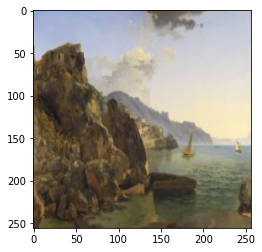

In [6]:
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Splitting the training data into train and test (80:20)
from sklearn.model_selection import train_test_split
import random
seed = 42
random.seed = seed
np.random.seed = seed
X_train, X_test = train_test_split(X_train, test_size=20, random_state=seed)

In [0]:
inception = tf.keras.applications.InceptionResNetV2(weights=None, include_top=True) # loading the Inception Resnet v2 model
inception.load_weights('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5') # importing pretrained weights for the model
inception.graph = tf.compat.v1.get_default_graph()

In [9]:
def Colorisation_Architecture():
    embed_input = Input(shape=(1000,))
    
    #Encoder
    en_in = Input(shape=(256, 256, 1,))
    en_out = Conv2D(128, (3,3), activation='relu', padding='same',strides=1)(en_in)
    en_out = MaxPooling2D((2, 2), padding='same')(en_out)
    en_out = Conv2D(128, (4,4), activation='relu', padding='same')(en_out)
    en_out = Conv2D(128, (3,3), activation='relu', padding='same',strides=1)(en_out)
    en_out = MaxPooling2D((2, 2), padding='same')(en_out)
    en_out = Conv2D(256, (4,4), activation='relu', padding='same')(en_out)
    en_out = Conv2D(256, (3,3), activation='relu', padding='same',strides=1)(en_out)
    en_out = MaxPooling2D((2, 2), padding='same')(en_out)
    en_out = Conv2D(256, (4,4), activation='relu', padding='same')(en_out)
    en_out = Conv2D(256, (3,3), activation='relu', padding='same')(en_out)
    en_out = Conv2D(256, (3,3), activation='relu', padding='same')(en_out)
    
    #Fusion
    fusion_out = RepeatVector(32 * 32)(embed_input) 
    fusion_out = Reshape(([32, 32, 1000]))(fusion_out)
    fusion_out = concatenate([en_out, fusion_out], axis=3) 
    fusion_out = Conv2D(256, (1, 1), activation='relu', padding='same')(fusion_out)
    
    #Decoder
    dec_out = Conv2D(128, (3,3), activation='relu', padding='same')(fusion_out)
    dec_out = Conv2D(64, (3,3), activation='relu', padding='same')(dec_out)
    dec_out = UpSampling2D((2, 2))(dec_out)
    dec_out = Conv2D(128, (3,3), activation='relu', padding='same')(dec_out)
    dec_out = UpSampling2D((2, 2))(dec_out)
    dec_out = Conv2D(64, (4,4), activation='relu', padding='same')(dec_out)
    dec_out = Conv2D(64, (3,3), activation='relu', padding='same')(dec_out)
    dec_out = Conv2D(32, (2,2), activation='relu', padding='same')(dec_out)
    dec_out = Conv2D(2, (3, 3), activation='tanh', padding='same')(dec_out)
    dec_out = UpSampling2D((2, 2))(dec_out)
    return Model(inputs=[en_in, embed_input], outputs=dec_out)

ICmodel = Colorisation_Architecture()                                           #Creating acrchitecture
ICmodel.compile(optimizer='adam', loss='mean_squared_error')                    #compiling the model
ICmodel.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 128 1280        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 128 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 128 262272      max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [0]:
#Importing functions for color space transformation
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb

In [0]:
#Converting images to lab colorspace
X_train_lab = rgb2lab(X_train)       

In [0]:
X =  X_train_lab[:,:,:,0]                               #Selecting lightness channel from lab colorspace
X = X.reshape(X.shape+(1,))                             # Reshaping for obtaining input in correct shape
Y = X_train_lab[:,:,:,1:]/128                           # Selecting the a and b channels as output to be predicted

In [0]:
gray_rgb = rgb2gray(X_train)
grayscaled = gray2rgb(gray_rgb)                         #representing grayscaled in rgb channels for input to inception resnet 

In [0]:
# Resizing to give input to incception resnet v2
grayscaled_resized  = np.array([resize(x,(299,299,3),mode="constant") for x in grayscaled ])

In [0]:
# Feed each image to inception resnet model
fusion_in = inception.predict(grayscaled_resized)

In [16]:
# Fitting the model
ICmodel.fit([X,fusion_in],Y,batch_size=32,epochs=30)

Epoch 1/30
2022/2022 [==============================] - 112s 56ms/step - loss: 0.0132
Epoch 2/30
2022/2022 [==============================] - 98s 48ms/step - loss: 0.0054
Epoch 3/30
2022/2022 [==============================] - 98s 48ms/step - loss: 0.0047
Epoch 4/30
2022/2022 [==============================] - 97s 48ms/step - loss: 0.0040
Epoch 5/30
2022/2022 [==============================] - 97s 48ms/step - loss: 0.0036
Epoch 6/30
2022/2022 [==============================] - 97s 48ms/step - loss: 0.0034
Epoch 7/30
2022/2022 [==============================] - 98s 48ms/step - loss: 0.0031
Epoch 8/30
2022/2022 [==============================] - 98s 49ms/step - loss: 0.0031
Epoch 9/30
2022/2022 [==============================] - 98s 49ms/step - loss: 0.0030
Epoch 10/30
2022/2022 [==============================] - 98s 48ms/step - loss: 0.0027
Epoch 11/30
2022/2022 [==============================] - 98s 49ms/step - loss: 0.0026
Epoch 12/30
2022/2022 [==============================] - 98s 4

In [0]:
#Converting Test images for prediction 
sample = X_test
X_test_sample = gray2rgb(rgb2gray(sample))                 
X_test_sample= rgb2lab(X_test_sample)[:,:,:,0]

In [0]:
# Converting test images for fusion input
   
grayscaled_rgb_resized_test  = np.array([resize(x,(299,299,3),mode="constant") for x in X_test_sample])
fusion_sample = inception.predict(grayscaled_rgb_resized_test)

In [19]:
import cv2

X_test_sample = X_test_sample.reshape(X_test_sample.shape+(1,))

output = ICmodel.predict([X_test_sample, fusion_sample])            # predicting coloured images from test grayscale images
output = output*128

decoded_imgs = np.zeros((len(output),256, 256, 3))

for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = X_test_sample[i][:,:,0]
    cur[:,:,1:] = output[i]
    decoded_imgs[i] = lab2rgb(cur)                                  # Converting lab images back to rgb
    cv2.imwrite("img_"+str(i)+".jpg", lab2rgb(cur))

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 205 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


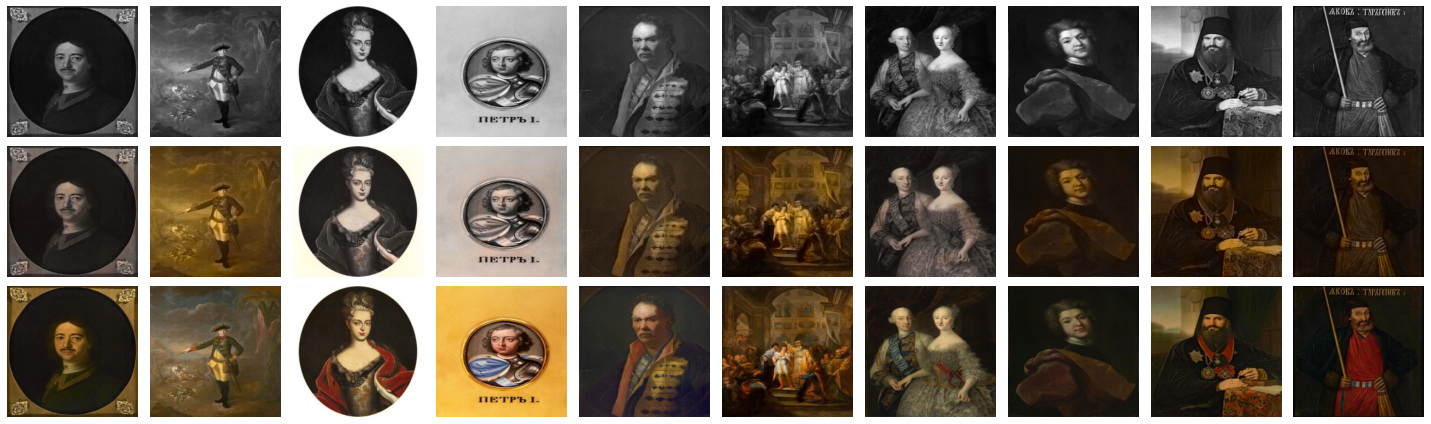

In [0]:
# plotting the results
plt.figure(figsize=(20, 6))
for i in range(10):
    # grayscale
    plt.subplot(3, 10, i + 1)
    plt.imshow(rgb2gray(X_test)[i].reshape(256, 256))
    plt.gray()
    plt.axis('off')
 
    # recolorization
    plt.subplot(3, 10, i + 1 +10)
    plt.imshow(decoded_imgs[i].reshape(256, 256,3))
    plt.axis('off')
    
    # original
    plt.subplot(3, 10, i + 1 + 20)
    plt.imshow(X_test[i].reshape(256, 256,3))
    plt.axis('off')
 
plt.tight_layout()
plt.show()